

# 911 Calls Data Analysis Capstone Project

© Darey.io

For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

# Table of Contents
1. [Data Setup and Initial Exploration](#data-setup)
2. [Feature Extraction](#feature-extraction)
3. [Handling Missing Data](#missing-data)
4. [Visualizations and Analysis](#visualizations)
5. [Conclusions](#conclusions)

In [6]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [7]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check the head of df**

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Check for missing values in zip and twp columns
missing_zip = df['zip'].isnull().sum()
missing_twp = df['twp'].isnull().sum()
print(f"Missing values in 'zip': {missing_zip}")
print(f"Missing values in 'twp': {missing_twp}")

# Strategy: Fill missing zip with mode (most common zip) and twp with 'Unknown'
if missing_zip > 0:
    df['zip'] = df['zip'].fillna(df['zip'].mode()[0])
if missing_twp > 0:
    df['twp'] = df['twp'].fillna('Unknown')

### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [35]:
top_zipcodes = df['zip'].value_counts().head(5)
print(top_zipcodes)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [36]:
top_townships = df['twp'].value_counts().head(5)
print(top_townships)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [37]:
unique_titles = df['title'].nunique()
print(unique_titles)

148


### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [38]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [39]:
most_common_reason = df['Reason'].value_counts()
print(most_common_reason)

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64


**Now use seaborn to create a countplot of 911 calls by Reason.**

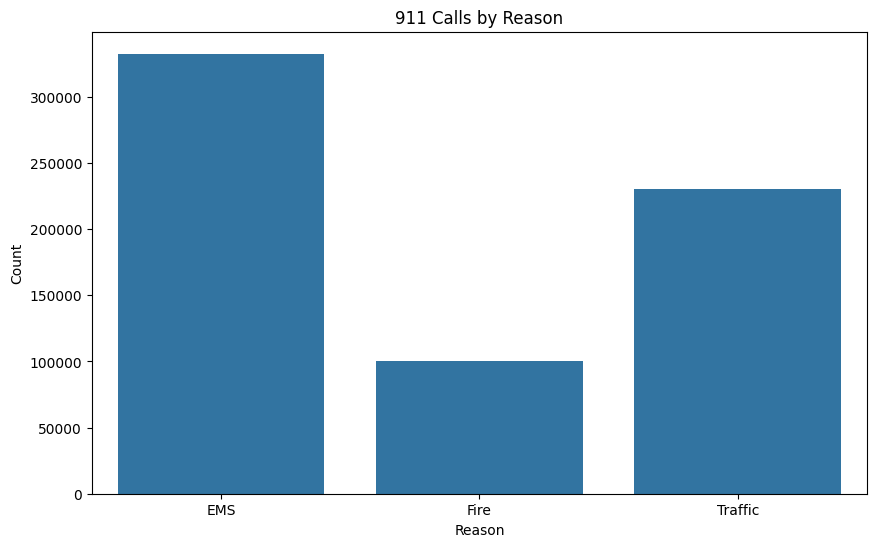

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason', data=df)
plt.title('911 Calls by Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [41]:
print(df['timeStamp'].dtype)

datetime64[ns]


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [42]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df['timeStamp'].dtype)

datetime64[ns]


**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [43]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.day_name())

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [44]:
print(df[['timeStamp', 'hour', 'month', 'day of week']].head())

            timeStamp  hour  month day of week
0 2015-12-10 17:10:52    17     12    Thursday
1 2015-12-10 17:29:21    17     12    Thursday
2 2015-12-10 14:39:21    14     12    Thursday
3 2015-12-10 16:47:36    16     12    Thursday
4 2015-12-10 16:56:52    16     12    Thursday


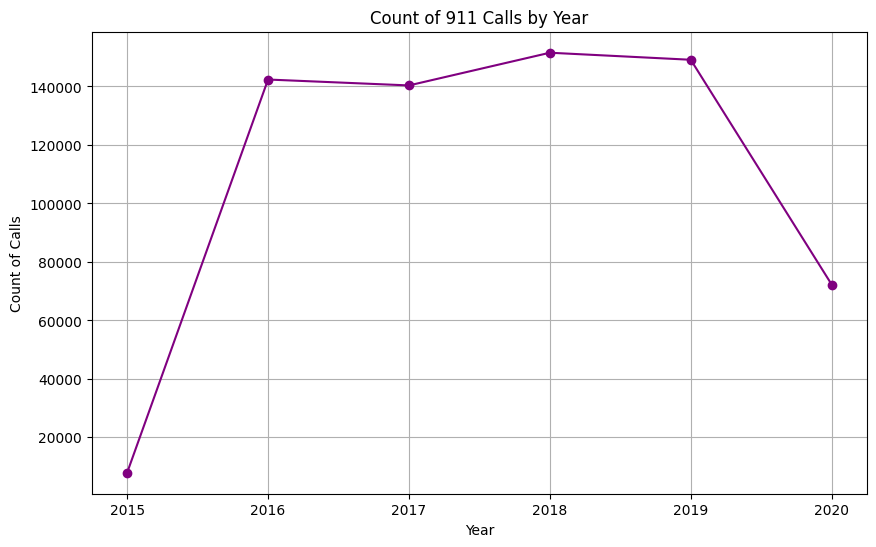

In [61]:
# Extract year from timeStamp and group by year
df['year'] = df['timeStamp'].apply(lambda x: x.year)  # Extract year using apply
byyear = df.groupby('year').count()['e']
plt.figure(figsize=(10, 6))
plt.plot(byyear.index, byyear, marker='o', color='purple')
plt.title('Count of 911 Calls by Year')
plt.xlabel('Year')
plt.ylabel('Count of Calls')
plt.grid(True)
plt.show()

# Box plot of calls per hour across all days
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='e', data=df)
plt.title('Box Plot of 911 Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Calls')
plt.show()

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

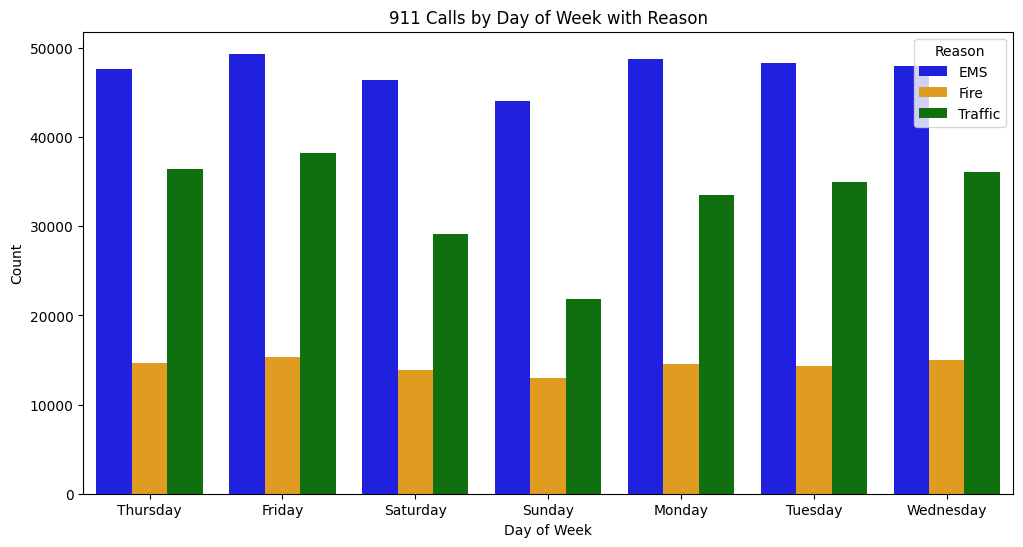

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day of week', hue='Reason', data=df, palette={'EMS': 'blue', 'Fire': 'orange', 'Traffic': 'green'})
plt.title('911 Calls by Day of Week with Reason')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Reason')
plt.show()

**Now do the same for Month:**

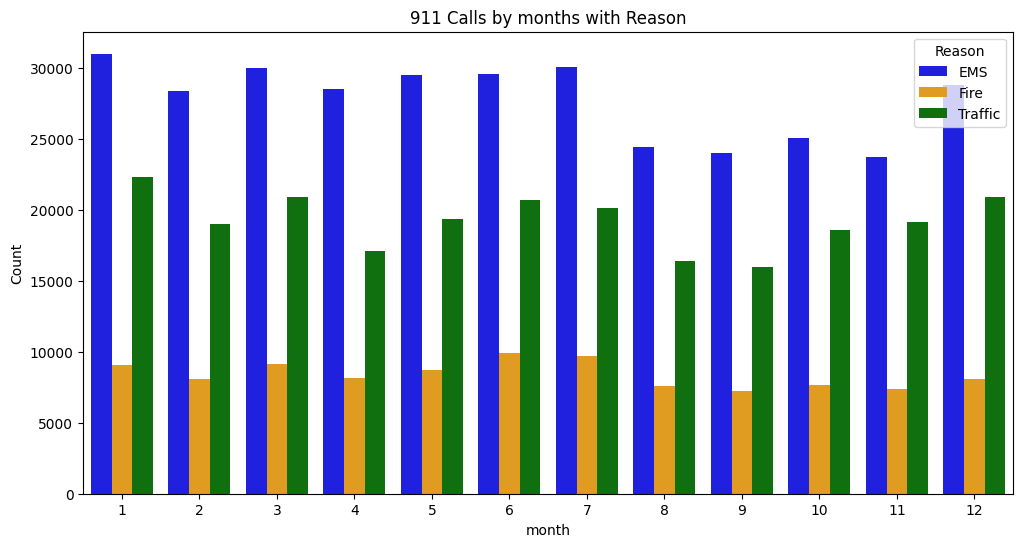

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='Reason', data=df, palette={'EMS': 'blue', 'Fire': 'orange', 'Traffic': 'green'})
plt.title('911 Calls by months with Reason')
plt.xlabel('month')
plt.ylabel('Count')
plt.legend(title='Reason')
plt.show()

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [ ]:
bymonth = df.groupby('month').count()
print(bymonth.head())

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      62336  62336  62336  55294  62336      62336  62312  62336  62336   
2      55427  55427  55427  48922  55427      55427  55405  55427  55427   
3      60027  60027  60027  53252  60027      60027  60001  60027  60027   
4      53671  53671  53671  47349  53671      53671  53655  53671  53671   
5      57509  57509  57509  50354  57509      57509  57474  57509  57509   

       Reason   hour  day of week   date   year  
month                                            
1       62336  62336        62336  62336  62336  
2       55427  55427        55427  55427  55427  
3       60027  60027        60027  60027  60027  
4       53671  53671        53671  53671  53671  
5       57509  57509        57509  57509  57509  


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

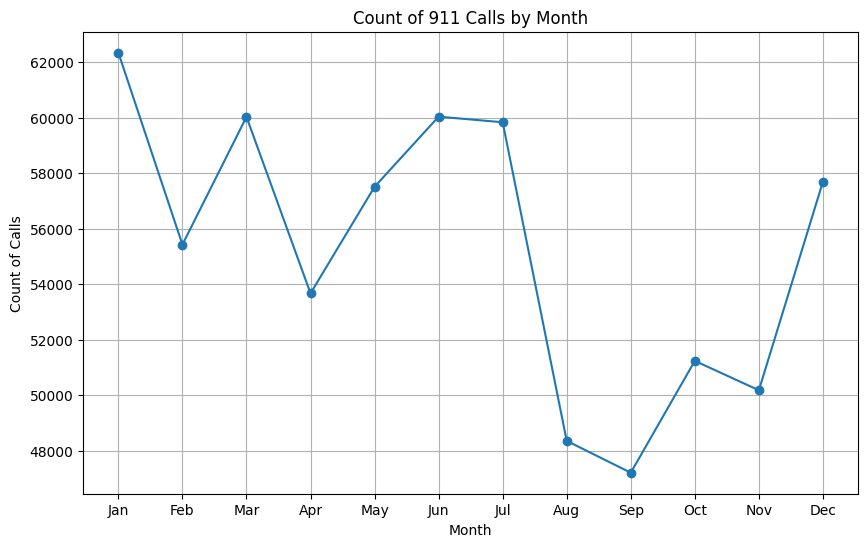

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(bymonth.index, bymonth['lat'], marker='o')
plt.title('Count of 911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

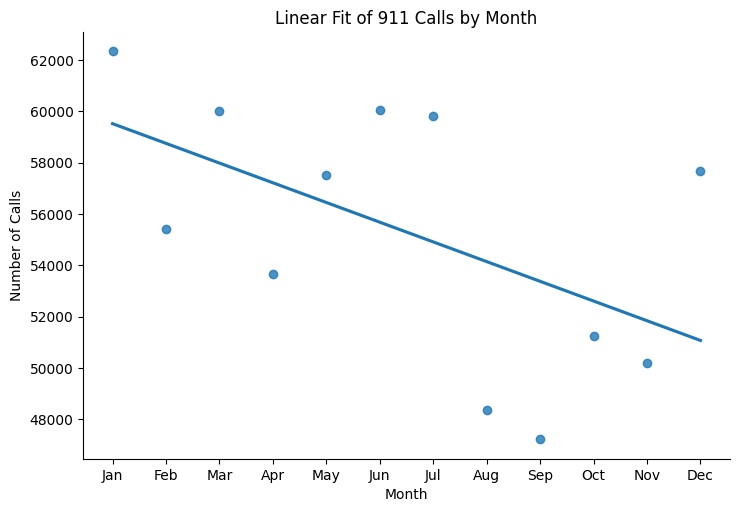

In [ ]:
bymonth_reset = bymonth.reset_index()
bymonth_reset = bymonth_reset.rename(columns={'lat': 'call_count'})
sns.lmplot(x='month', y='call_count', data=bymonth_reset, ci=None, aspect=1.5)
plt.title('Linear Fit of 911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [ ]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
print(df[['timeStamp', 'date']].head())

            timeStamp        date
0 2015-12-10 17:10:52  2015-12-10
1 2015-12-10 17:29:21  2015-12-10
2 2015-12-10 14:39:21  2015-12-10
3 2015-12-10 16:47:36  2015-12-10
4 2015-12-10 16:56:52  2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

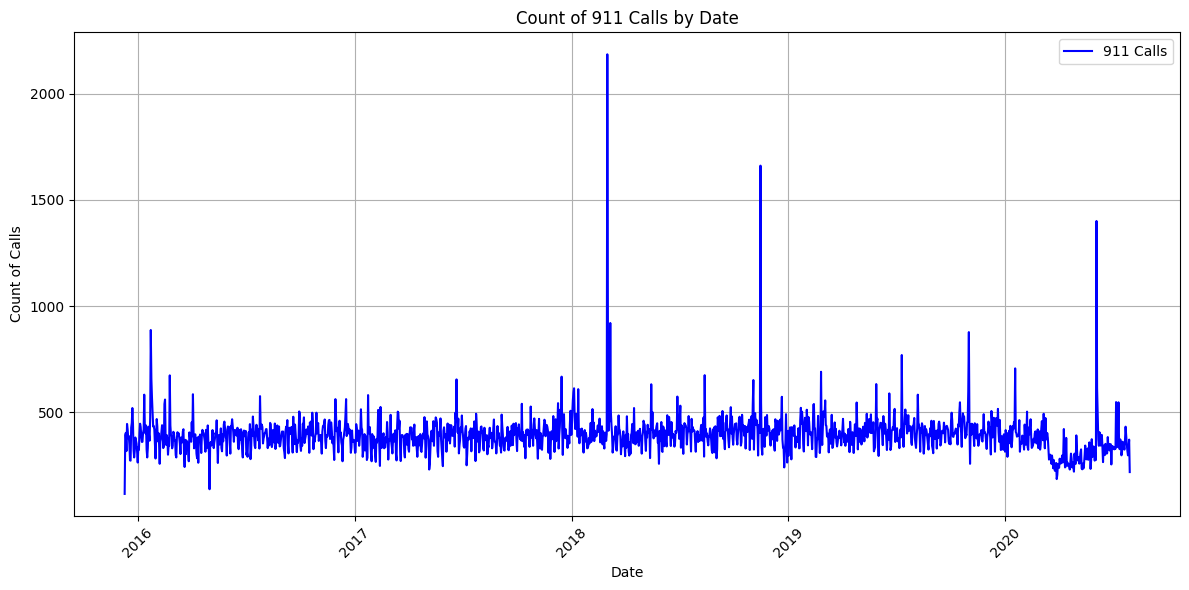

In [ ]:
bydate = df.groupby('date').count()
plt.figure(figsize=(12, 6))
plt.plot(bydate.index, bydate['lat'], label='911 Calls', color='blue')
plt.title('Count of 911 Calls by Date')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

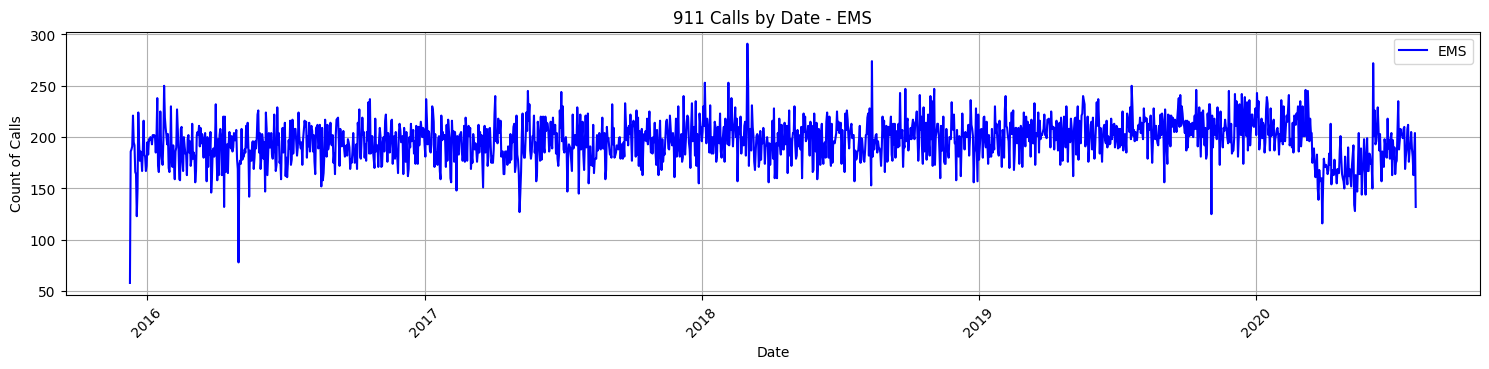

In [ ]:
# group by date and reason then count occurance
bydate_reason = df.groupby(['date', 'Reason']).count().unstack(fill_value=0)
ems_counts = bydate_reason['lat']['EMS']
fire_counts = bydate_reason['lat']['Fire']
traffic_counts = bydate_reason['lat']['Traffic']
plt.figure(figsize=(15, 10))

# Plot for EMS
plt.subplot(3, 1, 1)
plt.plot(ems_counts.index, ems_counts, color='blue', label='EMS')
plt.title('911 Calls by Date - EMS')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

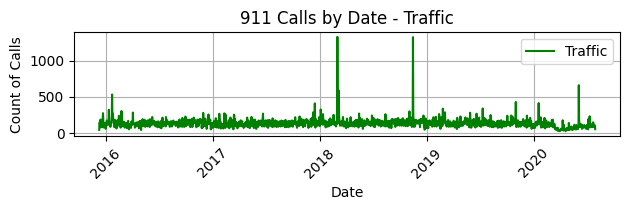

In [ ]:
# Plot for Traffic
plt.subplot(3, 1, 3)
plt.plot(traffic_counts.index, traffic_counts, color='green', label='Traffic')
plt.title('911 Calls by Date - Traffic')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

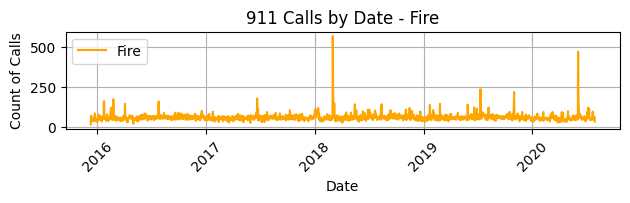

In [ ]:
# Plot for Fire
plt.subplot(3, 1, 2)
plt.plot(fire_counts.index, fire_counts, color='orange', label='Fire')
plt.title('911 Calls by Date - Fire')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [ ]:
byday_hour = df.groupby(['day of week', 'hour']).count()['e'].unstack(fill_value=0)
print(byday_hour)

hour           0     1     2     3     4     5     6     7     8     9   ...  \
day of week                                                              ...   
Friday       1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  ...   
Monday       1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  ...   
Saturday     2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  ...   
Sunday       2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  ...   
Thursday     1731  1408  1426  1236  1293  1775  2816  4432  5297  5412  ...   
Tuesday      1720  1459  1322  1213  1247  1741  2784  4425  5634  5566  ...   
Wednesday    1664  1484  1259  1265  1128  1609  2668  4644  5469  5444  ...   

hour           14    15    16    17    18    19    20    21    22    23  
day of week                                                              
Friday       6394  7040  7065  7113  5668  5056  4375  3913  3422  2834  
Monday       5713  6289  6346  6408  5441  4488  3823  32

**Now create a HeatMap using this new DataFrame.**

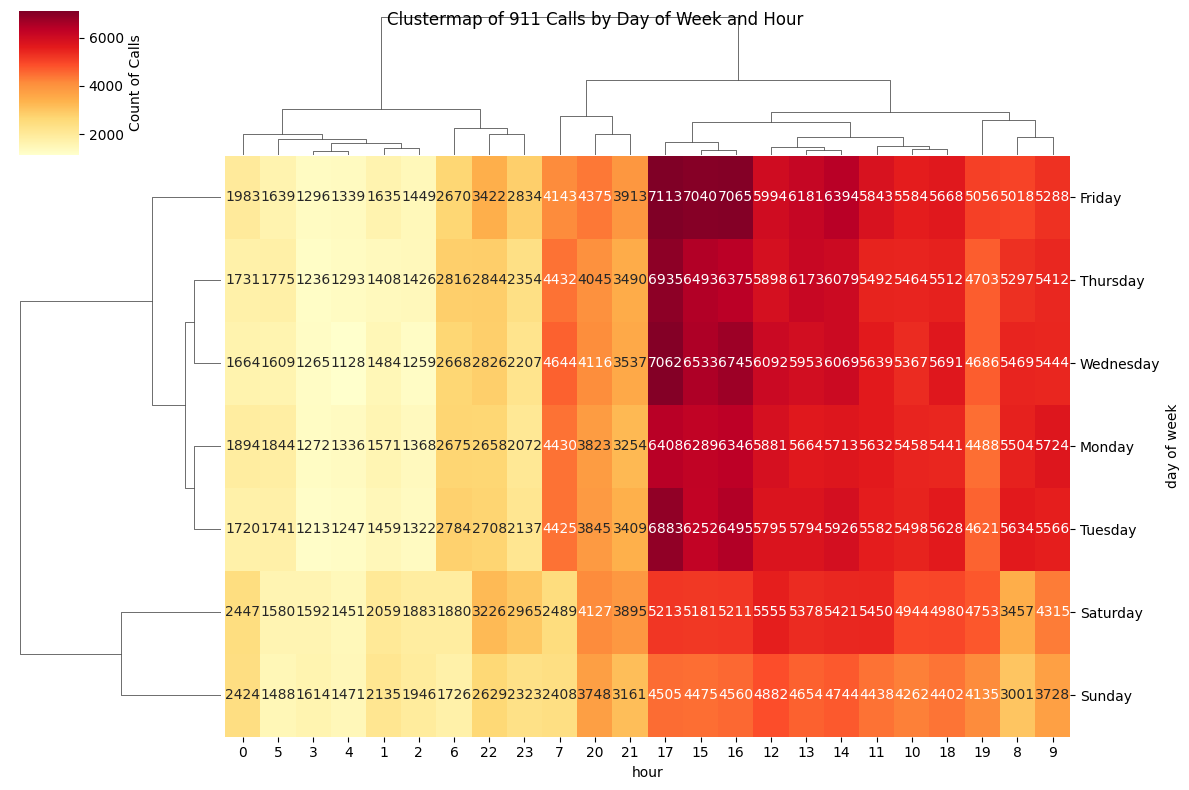

In [56]:
# Group by day of week and hour, count calls using 'e' column, and unstack to pivot hours into columns
byday_hour = df.groupby(['day of week', 'hour']).count()['e'].unstack(fill_value=0)
# Create clustermap to visualize call patterns with clustering
g = sns.clustermap(byday_hour, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Count of Calls'}, figsize=(12, 8))
g.fig.suptitle('Clustermap of 911 Calls by Day of Week and Hour')
plt.show()

**Now create a clustermap using this DataFrame.**

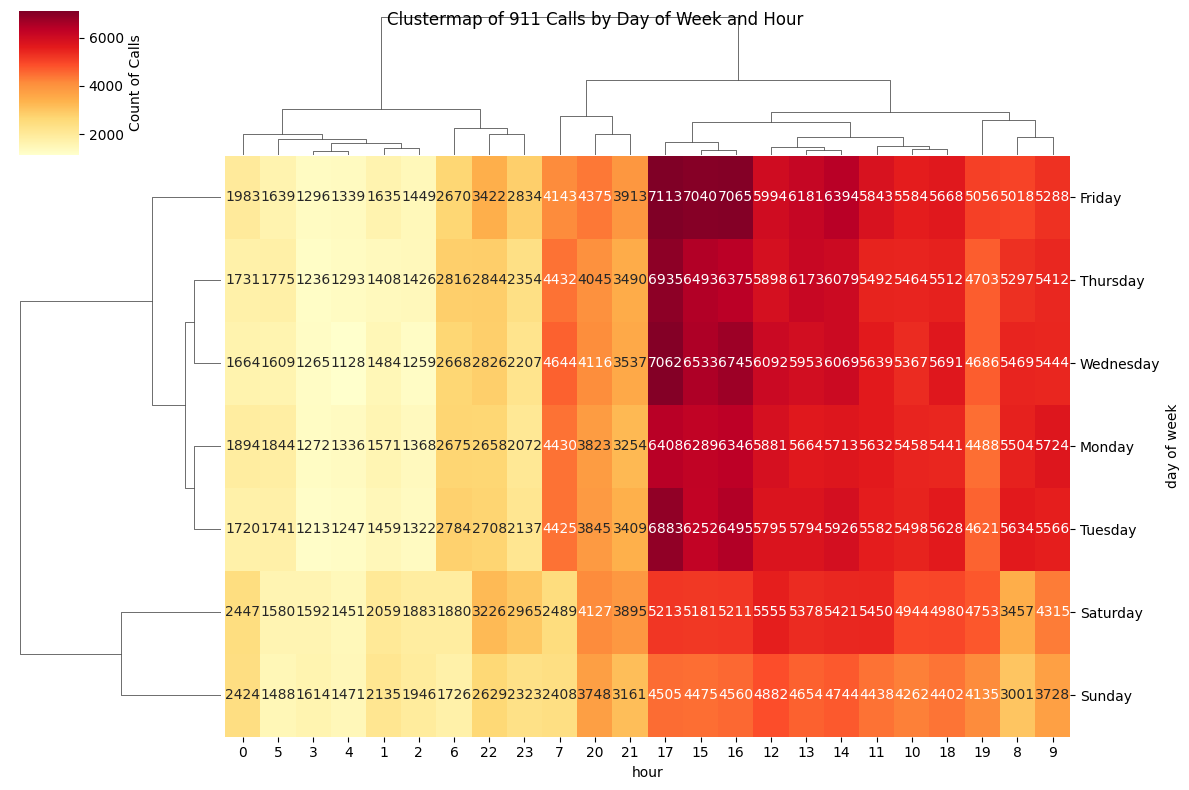

In [57]:
g = sns.clustermap(byday_hour, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Count of Calls'}, figsize=(12, 8))
g.fig.suptitle('Clustermap of 911 Calls by Day of Week and Hour')
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [58]:
byday_month = df.groupby(['day of week', 'month']).count()['e'].unstack(fill_value=0)


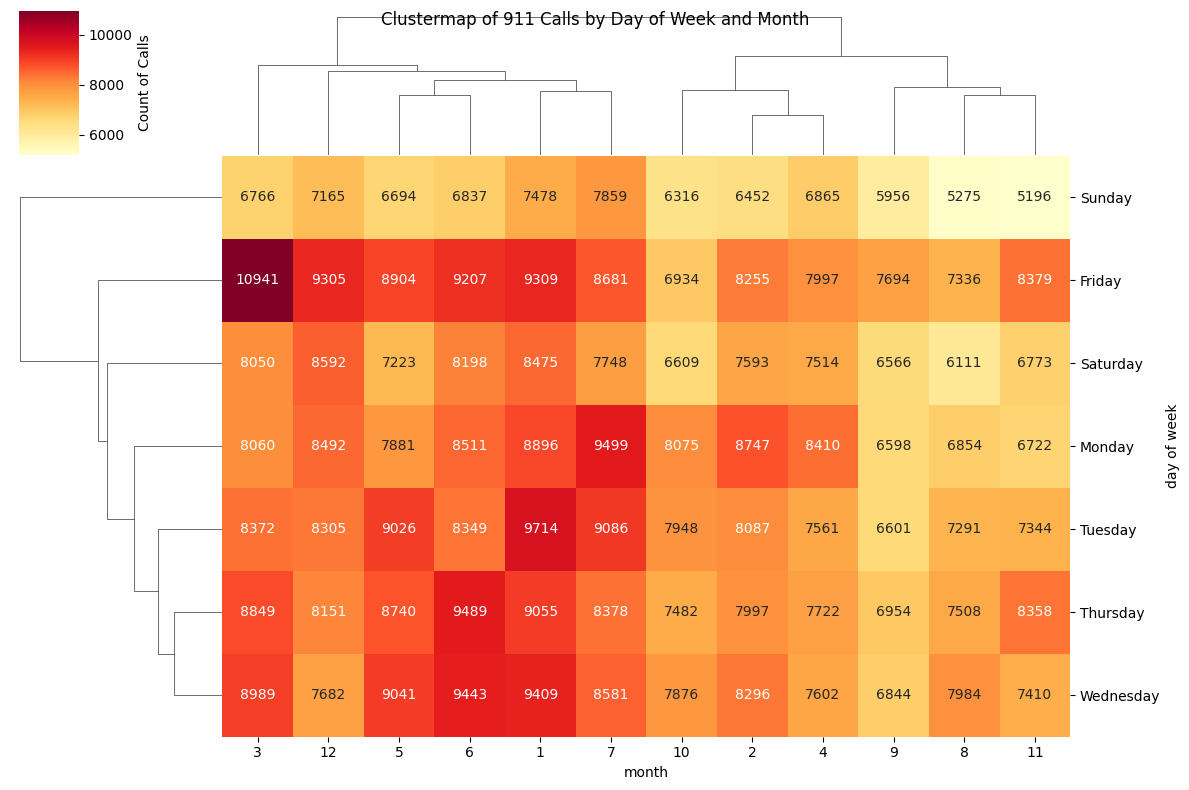

In [59]:
g = sns.clustermap(byday_month, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Count of Calls'}, figsize=(12, 8))
g.fig.suptitle('Clustermap of 911 Calls by Day of Week and Month')
plt.show()

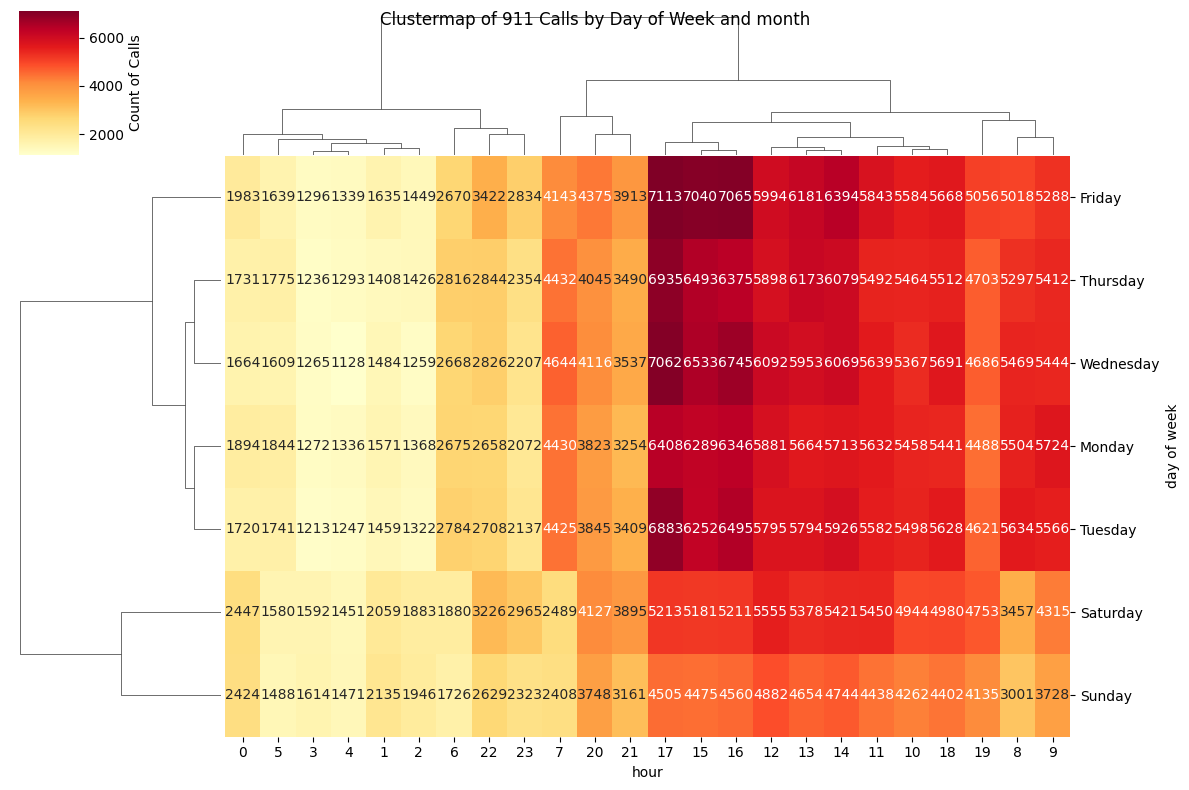

In [60]:
g = sns.clustermap(byday_hour, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Count of Calls'}, figsize=(12, 8))
g.fig.suptitle('Clustermap of 911 Calls by Day of Week and month')
plt.show()

## Conclusions
- EMS calls dominate (332,692), suggesting a focus on medical emergencies.
- Peak call times occur on Fridays (17:00-22:00), likely due to weekend onset activity.
- Seasonal patterns show higher calls in early months (e.g., January), possibly linked to weather or holidays.
- Missing data in 'zip' and 'twp' was handled by filling with mode and 'Unknown', preserving analysis integrity.

**Continue exploring the Data however you see fit!**
# Great Job!